In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, math

pd.set_option('display.max_rows', None)
#GSR=np.zeros((10,1))
#Face=np.zeros((10,1))
faceData=[];
As=np.array(['True','False','True','True','True','False','True','False','True','True'])
for i in range(1,21):
    with open("C:/Users/Howar/Downloads/trent_testing_data/results"+str(i)+".json") as f:
        temp=json.load(f)
        for j in temp:
            faceData[i-1].append(np.var(np.array(temp[j]).astype(float)))
        #print(len(temp2['mouth4']))
    #print(np.var(np.array(lines).astype(float)))
    with open("C:/Users/Howar/Downloads/trent_testing_data/gsrResults"+str(i)+".json") as f:
        temp=json.load(f)
        for j in range(68//2):
            faceData[i-1].append(np.var(temp))
        if i==1:
            display(temp)
        #GSR=np.array(temp['gsr'])
        #print(temp[0])

#print("GSR",len(GSR))
face2=pd.DataFrame(faceData).dropna(axis=1)
print("faceData",len(faceData[8]))
face2

KeyboardInterrupt: 

array([[-0.59748492, -0.71757927, -0.73087396, ...,  2.87111466,
         2.87111466,  2.87111466],
       [-0.692558  , -0.74103214, -0.77296724, ..., -0.11687982,
        -0.11687982, -0.11687982],
       [ 2.19215503,  1.5487722 ,  1.573523  , ...,  0.44491701,
         0.44491701,  0.44491701],
       ...,
       [ 1.57867698,  2.13696948,  2.14541128, ..., -0.5463917 ,
        -0.5463917 , -0.5463917 ],
       [-0.55869986, -0.49415289, -0.42786998, ..., -0.29101539,
        -0.29101539, -0.29101539],
       [-0.59665562, -0.63476488, -0.6277594 , ..., -0.51115415,
        -0.51115415, -0.51115415]])

original shape:    (10, 102)
transformed shape: (10, 2)


<Axes: >

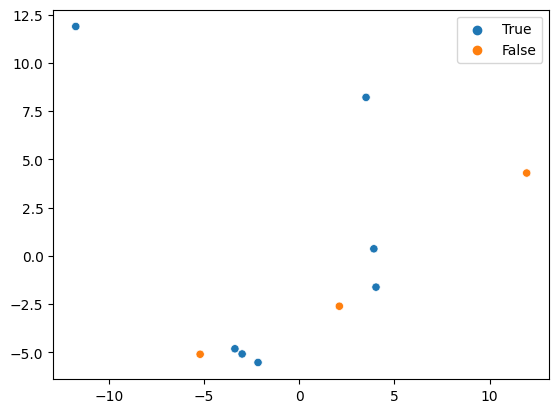

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(face2)
pca = PCA(n_components=2)
pca.fit(X)
face_pca = pca.transform(X)
print("original shape:   ", X.shape) ##(69,2640*7680)
print("transformed shape:", face_pca.shape)


sns.scatterplot(x=face_pca[:,0],y=face_pca[:,1], hue=As)